# Polynomial Regression Exercise

### This is a test exercise that checks for any non-linear effects in the dataset and perform polynomial regression on it.

In [19]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [4]:
df = pd.read_csv(r"C:\Jupyter Projects\Machine Learning\IBM\Supervised ML\Linear Regression\Datasets\encoded_car_data.csv")
df.head()

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,curbweight,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,price
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,13495.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,2548.0,130.0,3.47,111.0,168.8,64.1,21.0,27.0,16500.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,2823.0,152.0,2.68,154.0,171.2,65.5,19.0,26.0,16500.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,2337.0,109.0,3.19,102.0,176.6,66.2,24.0,30.0,13950.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,2824.0,136.0,3.19,115.0,176.6,66.4,18.0,22.0,17450.0


In [5]:
df.isnull().any()

diesel         False
gas            False
std            False
turbo          False
convertible    False
hardtop        False
hatchback      False
sedan          False
wagon          False
4wd            False
fwd            False
rwd            False
dohc           False
dohcv          False
l              False
ohc            False
ohcf           False
ohcv           False
rotor          False
eight          False
five           False
four           False
six            False
three          False
twelve         False
two            False
wheelbase      False
curbweight     False
enginesize     False
boreratio      False
horsepower     False
carlength      False
carwidth       False
citympg        False
highwaympg     False
price          False
dtype: bool

In [7]:
df.duplicated().sum()

2

In [8]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [57]:
X = df.drop('price', axis=1)
y = df.price

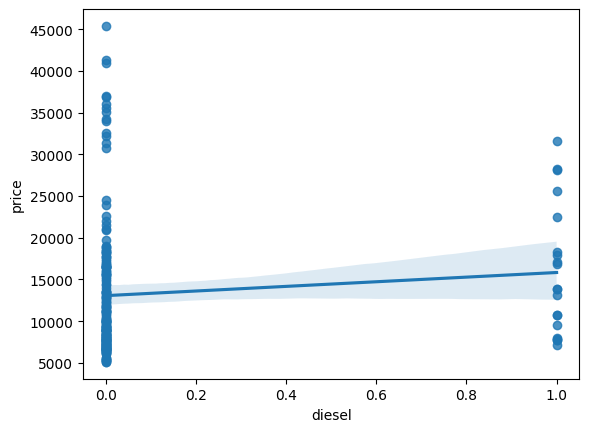

<Figure size 500x500 with 0 Axes>

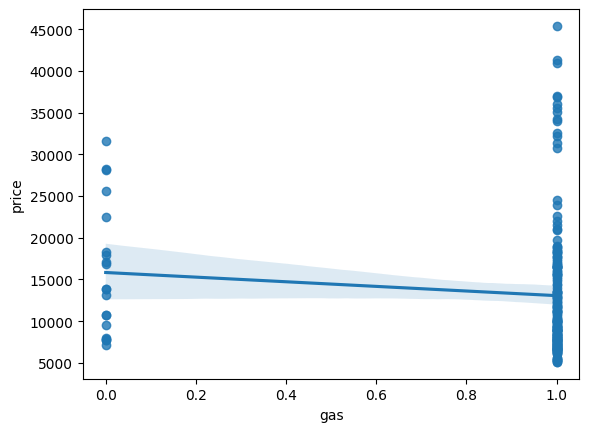

<Figure size 500x500 with 0 Axes>

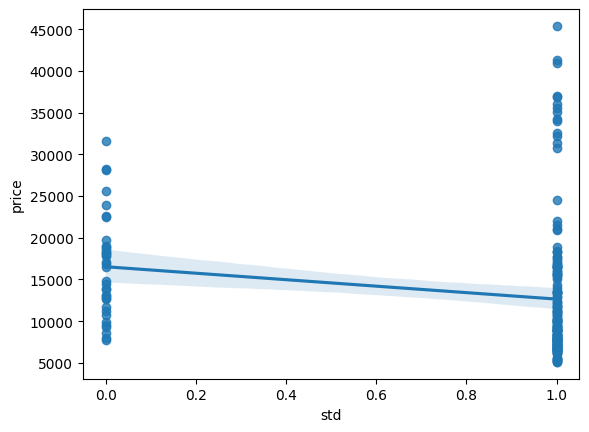

<Figure size 500x500 with 0 Axes>

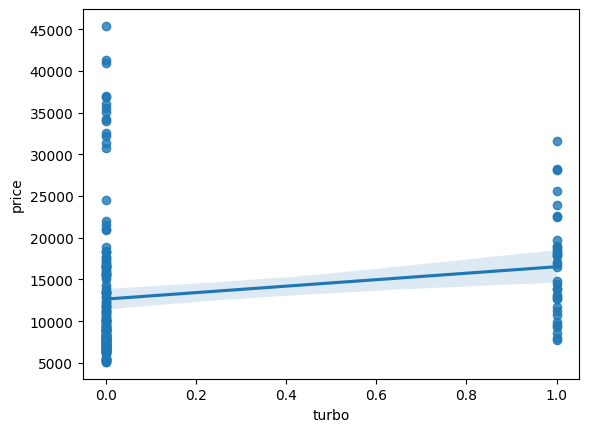

<Figure size 500x500 with 0 Axes>

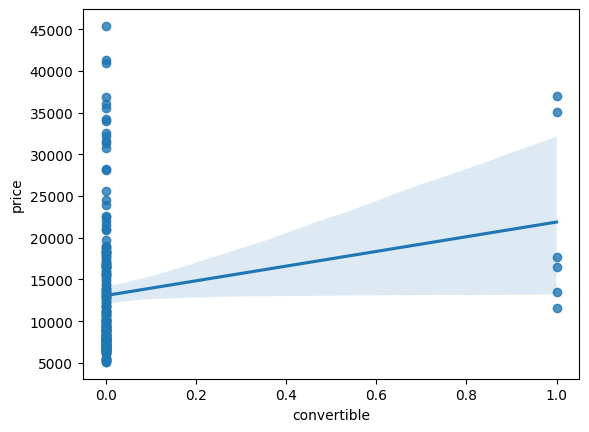

<Figure size 500x500 with 0 Axes>

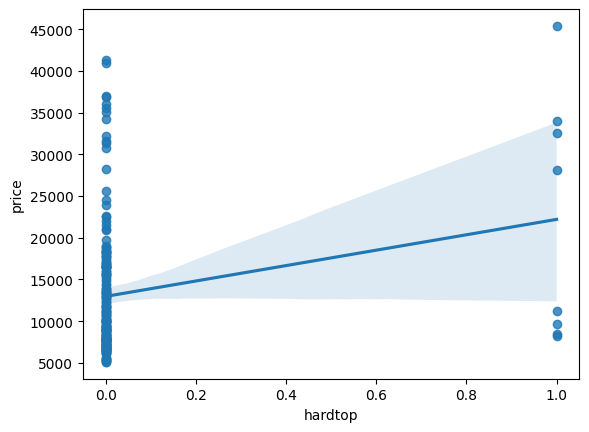

<Figure size 500x500 with 0 Axes>

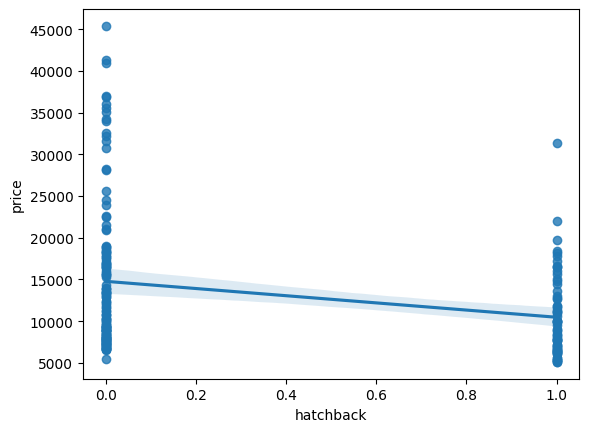

<Figure size 500x500 with 0 Axes>

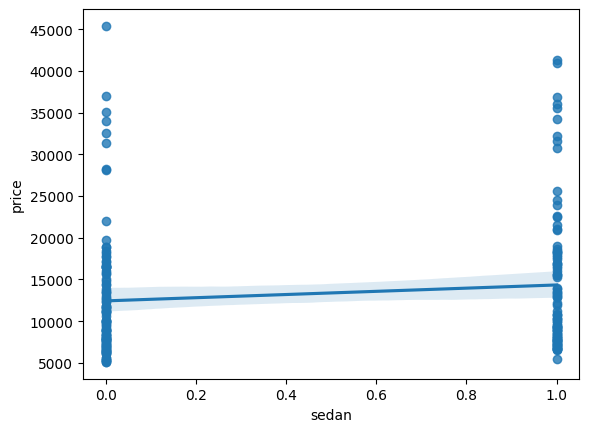

<Figure size 500x500 with 0 Axes>

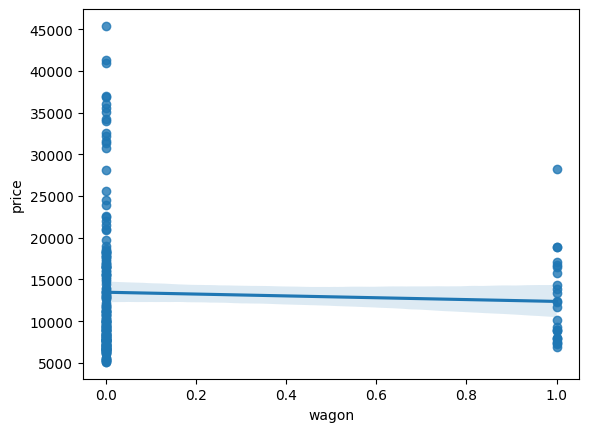

<Figure size 500x500 with 0 Axes>

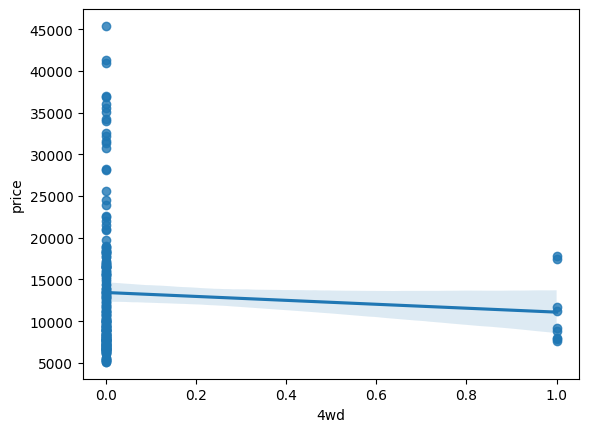

<Figure size 500x500 with 0 Axes>

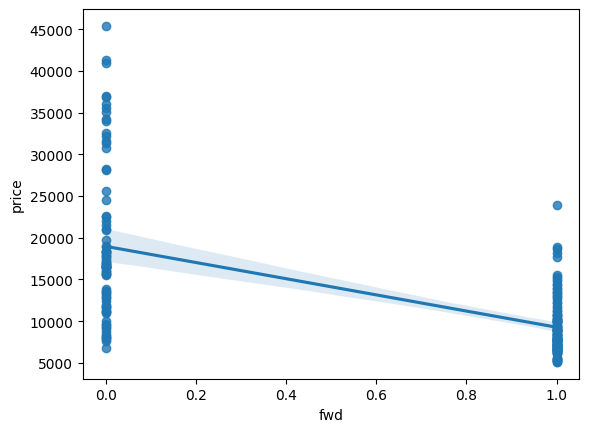

<Figure size 500x500 with 0 Axes>

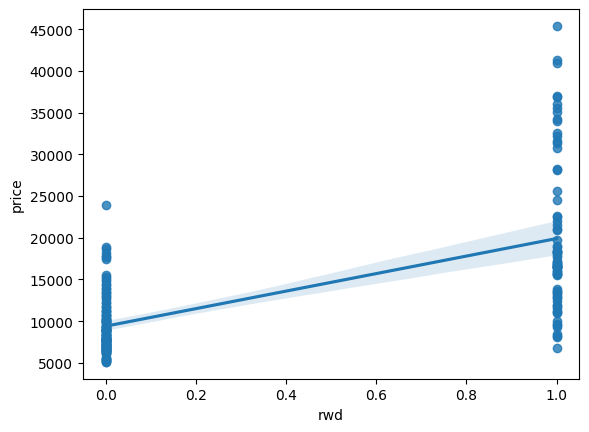

<Figure size 500x500 with 0 Axes>

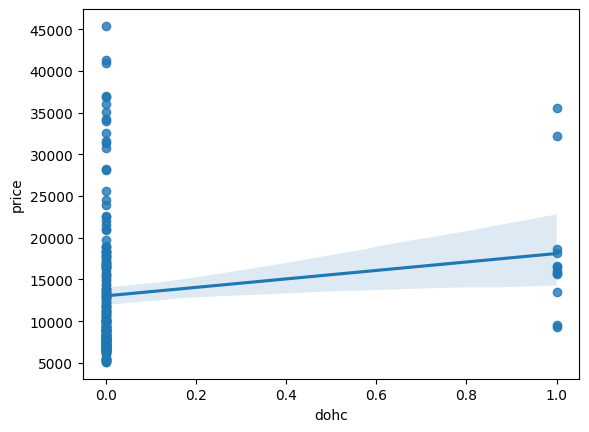

<Figure size 500x500 with 0 Axes>

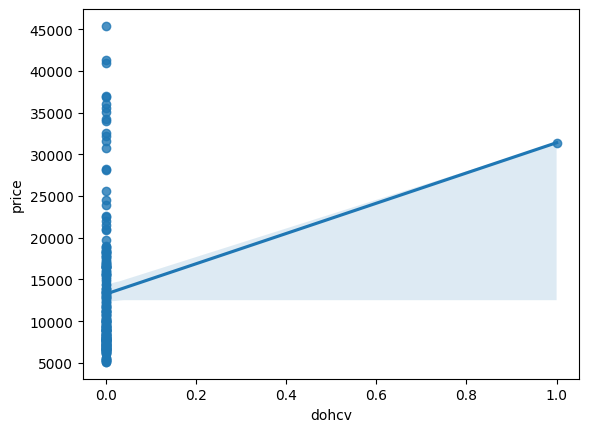

<Figure size 500x500 with 0 Axes>

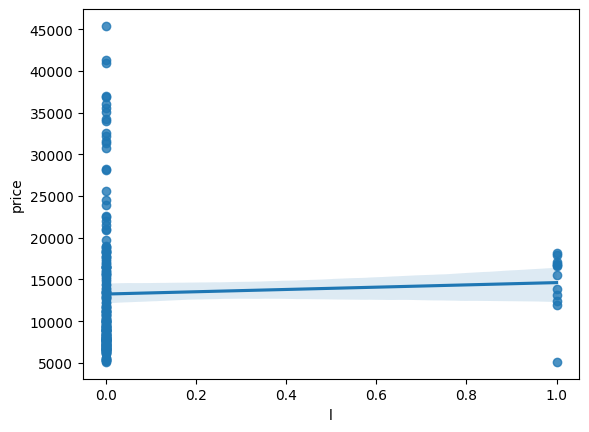

<Figure size 500x500 with 0 Axes>

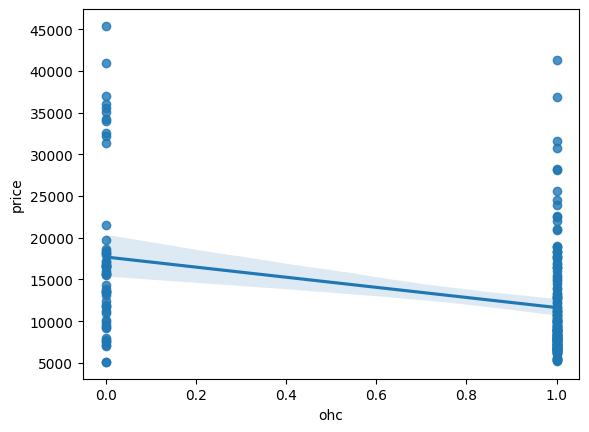

<Figure size 500x500 with 0 Axes>

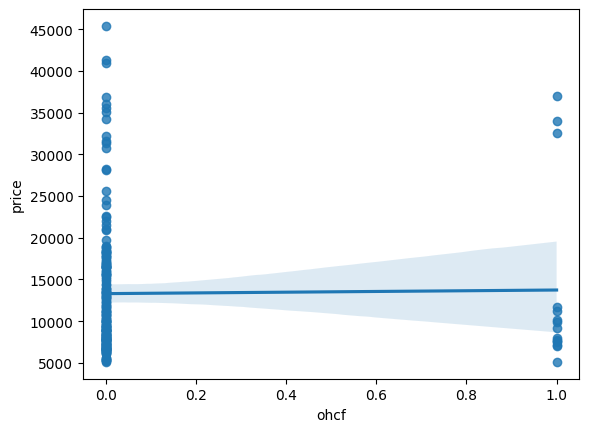

<Figure size 500x500 with 0 Axes>

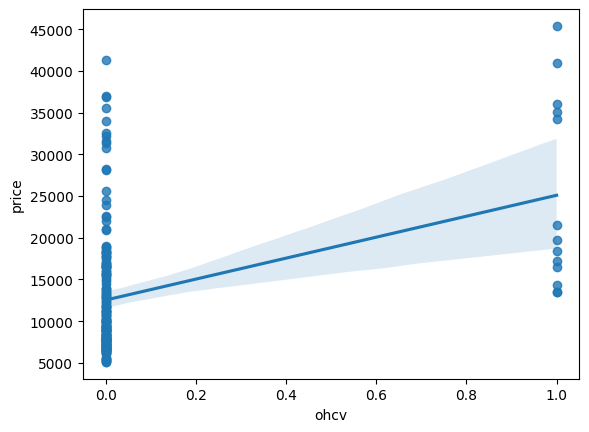

<Figure size 500x500 with 0 Axes>

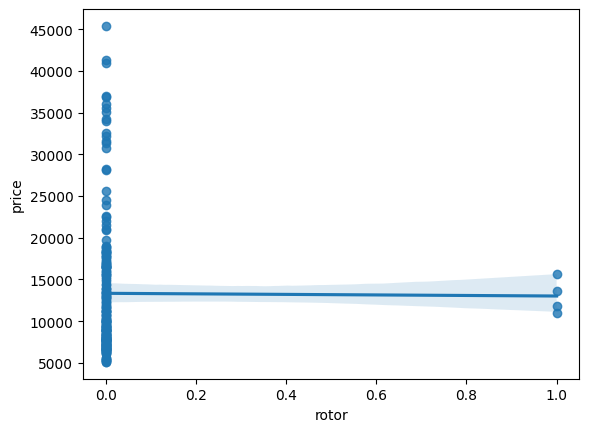

<Figure size 500x500 with 0 Axes>

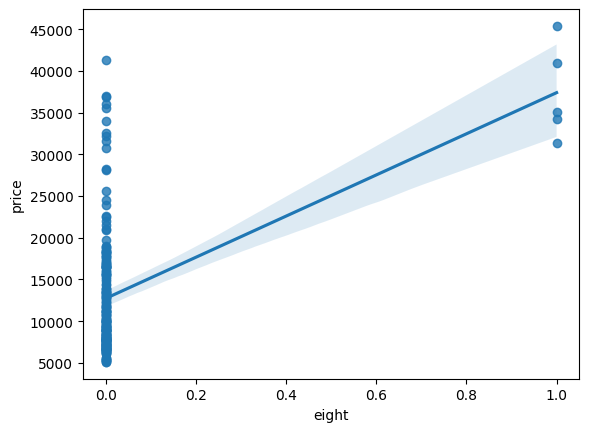

<Figure size 500x500 with 0 Axes>

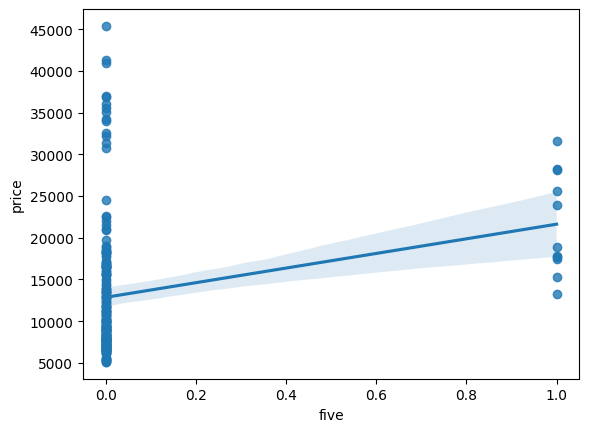

<Figure size 500x500 with 0 Axes>

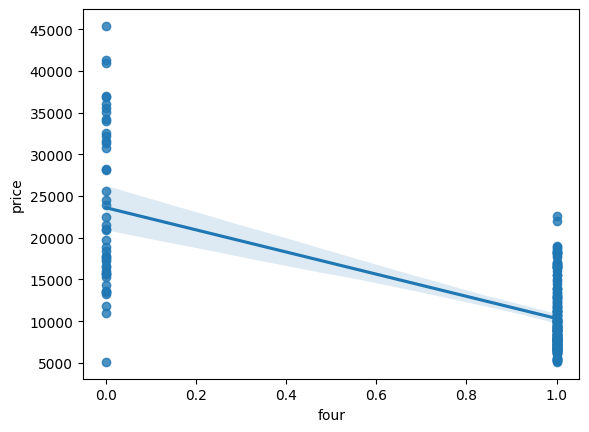

<Figure size 500x500 with 0 Axes>

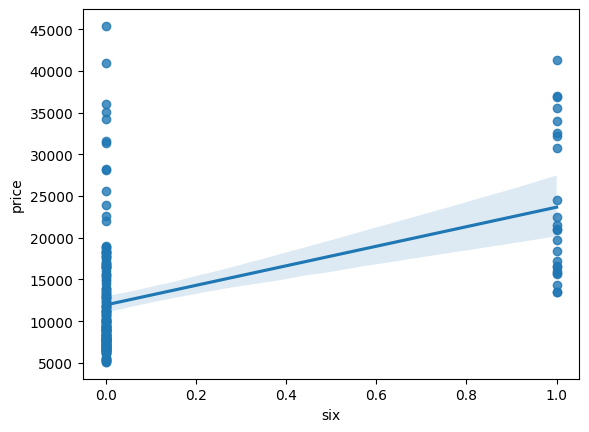

<Figure size 500x500 with 0 Axes>

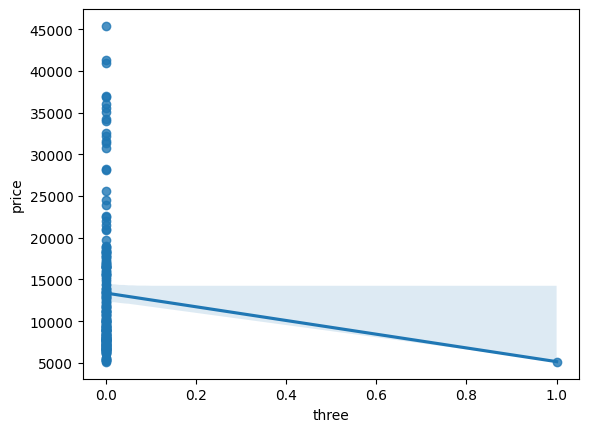

<Figure size 500x500 with 0 Axes>

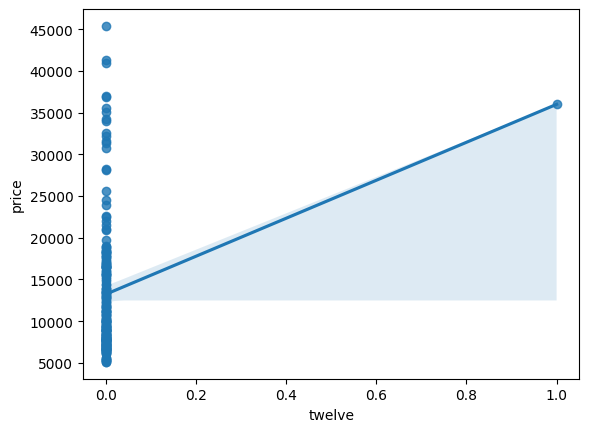

<Figure size 500x500 with 0 Axes>

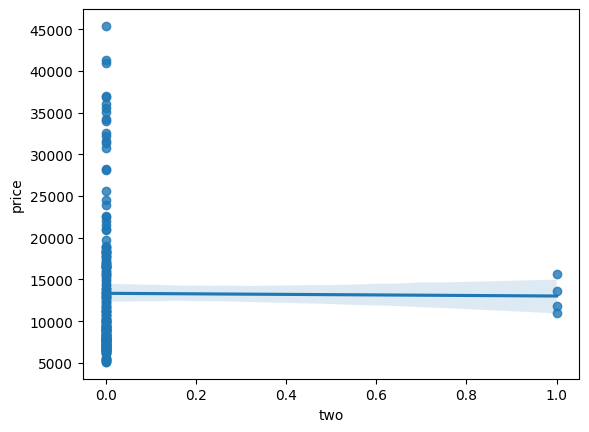

<Figure size 500x500 with 0 Axes>

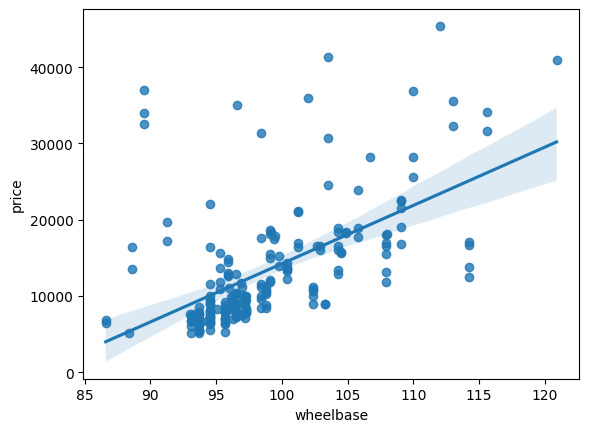

<Figure size 500x500 with 0 Axes>

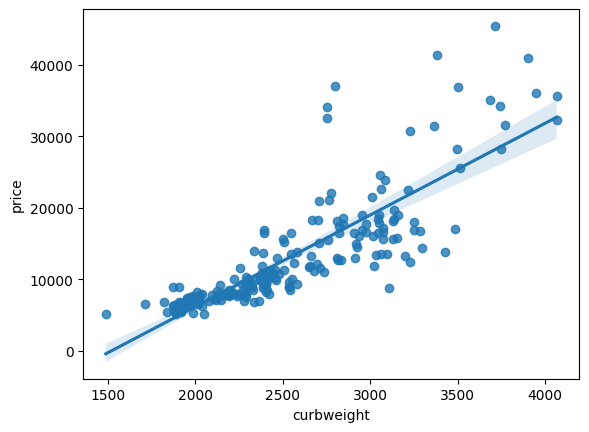

<Figure size 500x500 with 0 Axes>

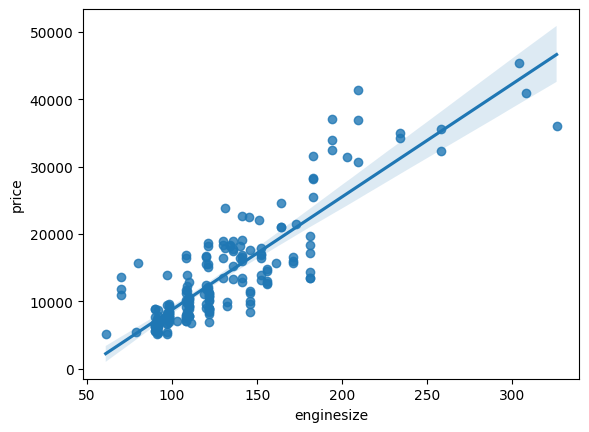

<Figure size 500x500 with 0 Axes>

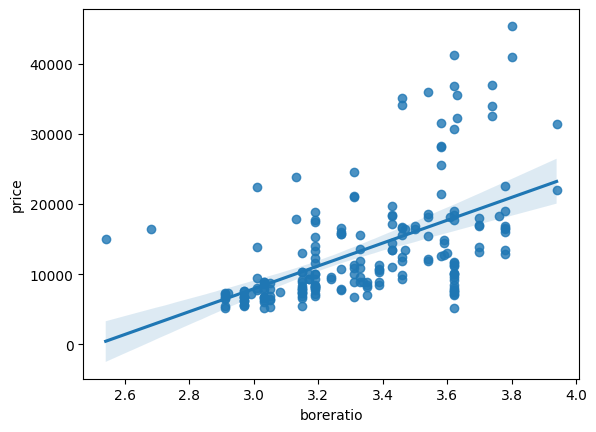

<Figure size 500x500 with 0 Axes>

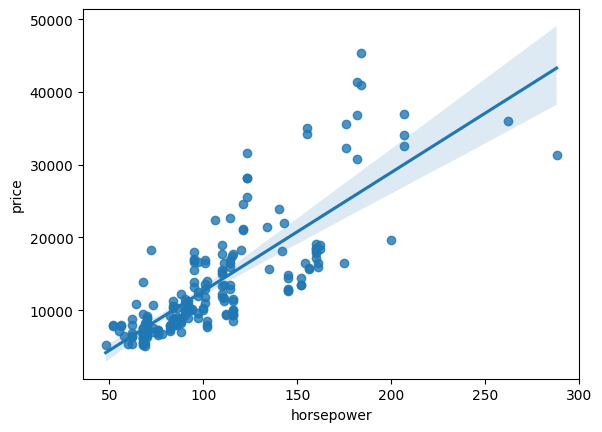

<Figure size 500x500 with 0 Axes>

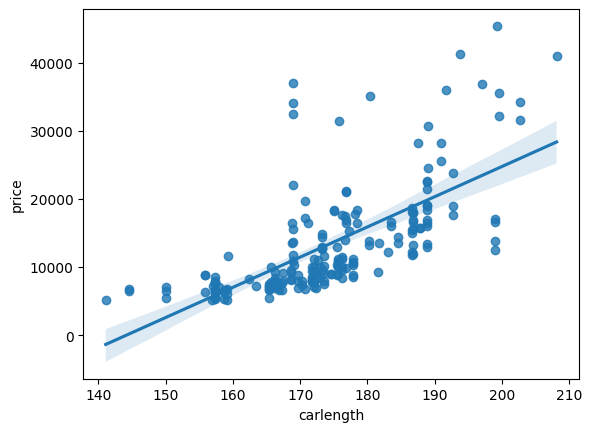

<Figure size 500x500 with 0 Axes>

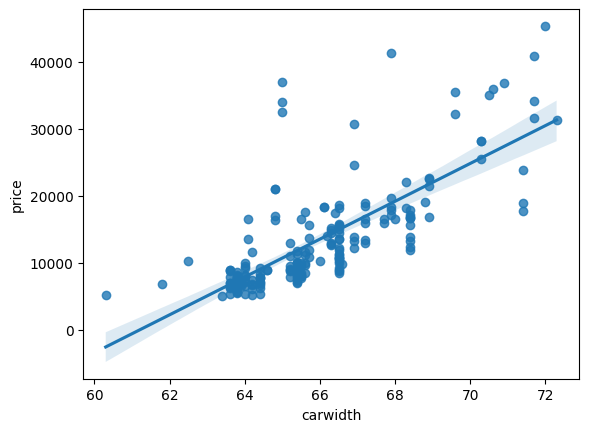

<Figure size 500x500 with 0 Axes>

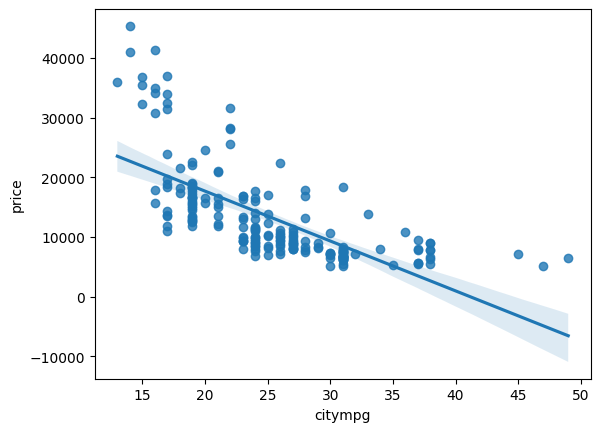

<Figure size 500x500 with 0 Axes>

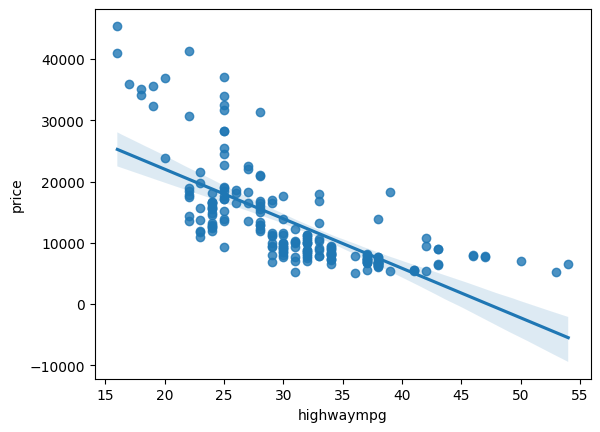

<Figure size 500x500 with 0 Axes>

In [14]:
for x in X.columns:
    sns.regplot(x=df[x], y=y)
    plt.figure(figsize=(5, 5))
    plt.show()

Curbweight has a curvilinear relationship with the target feature

## Without Polynomial Features of Curbweight

In [15]:
X.shape

(203, 35)

In [16]:
y.shape

(203,)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)

In [29]:
X_test.shape

(61, 35)

In [20]:
steps = [('scaler', StandardScaler()), ('linearReg', LinearRegression())]

pipe = Pipeline(steps=steps)

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearReg', LinearRegression())])

In [31]:
predicted = pipe.predict(X_test)
print(f"R2 score : {pipe.score(X_test, y_test)}")

R2 score : 0.8472991458327069


In [32]:
print(f"R2 score : {r2_score(y_test, predicted)}")

R2 score : 0.8472991458327069


## With Polynomial Features of Curbweight

In [33]:
polyFeat = PolynomialFeatures(degree=2, include_bias=False)

In [58]:
curb_weight = X[['curbweight']]
curb_weight_poly = polyFeat.fit_transform(curb_weight)
curb_weight_poly_df = pd.DataFrame(curb_weight_poly, columns=polyFeat.get_feature_names_out(['curbweight']))

In [59]:
X.drop('curbweight', inplace=True, axis=1)
curb_weight_poly_X = pd.concat([X, curb_weight_poly_df], axis=1)

In [60]:
curb_weight_poly_X

,diesel,gas,std,turbo,convertible,hardtop,hatchback,sedan,wagon,4wd,...,wheelbase,enginesize,boreratio,horsepower,carlength,carwidth,citympg,highwaympg,curbweight,curbweight^2
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,130.0,3.47,111.0,168.8,64.1,21.0,27.0,2548.0,6492304.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,88.6,130.0,3.47,111.0,168.8,64.1,21.0,27.0,2548.0,6492304.0
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,94.5,152.0,2.68,154.0,171.2,65.5,19.0,26.0,2823.0,7969329.0
3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,99.8,109.0,3.19,102.0,176.6,66.2,24.0,30.0,2337.0,5461569.0
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,99.4,136.0,3.19,115.0,176.6,66.4,18.0,22.0,2824.0,7974976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,173.0,3.58,134.0,188.8,68.9,18.0,23.0,3062.0,9375844.0
203,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,145.0,3.01,106.0,188.8,68.9,26.0,27.0,NaN,NaN
204,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,109.1,141.0,3.78,114.0,188.8,68.9,19.0,25.0,NaN,NaN
119,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989.0,3956121.0


In [61]:
curb_weight_poly_X.isnull().any()

diesel          True
gas             True
std             True
turbo           True
convertible     True
hardtop         True
hatchback       True
sedan           True
wagon           True
4wd             True
fwd             True
rwd             True
dohc            True
dohcv           True
l               True
ohc             True
ohcf            True
ohcv            True
rotor           True
eight           True
five            True
four            True
six             True
three           True
twelve          True
two             True
wheelbase       True
enginesize      True
boreratio       True
horsepower      True
carlength       True
carwidth        True
citympg         True
highwaympg      True
curbweight      True
curbweight^2    True
dtype: bool

In [62]:
curb_weight_poly_X = curb_weight_poly_X.dropna()

In [67]:
y.drop(y.index[-2:], axis=0, inplace=True)

In [68]:
y.shape

(201,)

In [69]:
curb_weight_poly_X.shape

(201, 36)

In [74]:
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(curb_weight_poly_X, y, test_size=.3, random_state=0)

In [75]:
steps = [('scaler', StandardScaler()), ('linearReg', LinearRegression())]

pipe = Pipeline(steps=steps)

In [76]:
X_poly_train.shape

(140, 36)

In [78]:
y_poly_train.shape

(140,)

In [79]:
pipe.fit(X_poly_train, y_poly_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linearReg', LinearRegression())])

In [81]:
predicted = pipe.predict(X_poly_test)
print(f"R2 score : {r2_score(y_poly_test, predicted)}")

R2 score : 0.8543682519693121


# Conclusion

R2 Scores:

* Without Polynomial Features = 0.8472991458327069
* With Polynomial Features = 0.8543682519693121

Adding polynomial features to the non-linear relationships will increase the performance of the model.

There is a 1% increase in the model's performance, although this is small difference as I used only one feature in predicting the non-linear effects, but when used multiple, there is a possibility of significant difference in the performance.